# WIPRO

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("..\Revenue Data\Largecap_rev.xlsx")
result = pd.read_csv("..\Stock Data\large_cap_stock.csv")
lis = ["WIPRO.NS","WIPRO_Return"]
wp_st = result[lis]
wp_st = wp_st.copy()
wp_st["INDEX"]=np.arange(0,11)
wp_re = df[df["COMPANY"]=="WIPRO"]
wp_re = wp_re.copy()
wp_re["INDEX"]=np.flip(np.arange(0,11))

In [3]:
wipro = pd.merge(wp_re,wp_st)
wipro = wipro.sort_values("INDEX")
wipro = wipro.drop("INDEX",axis=1)
wipro = wipro.drop("COMPANY",axis=1)
wipro

,TIME PERIOD,REVENUE (in Cr),REVENUE GROWTH RATE,WIPRO.NS,WIPRO_Return
10,2014-04-01,43762,16.116536,105.917091,18.854497
9,2015-04-01,47318,8.125771,98.330406,-7.162853
8,2016-04-01,51630,9.112811,90.426605,-8.038003
7,2017-04-01,55417,7.334883,99.243690,9.750543
6,2018-04-01,54635,-1.411119,120.578621,21.497518
5,2019-04-01,58906,7.817333,93.478180,-22.475328
4,2020-04-01,61340,4.132007,197.704391,111.497904
3,2021-04-01,62242,1.470492,283.479218,43.385392
2,2022-04-01,79528,27.772244,178.304642,-37.101336
1,2023-04-01,90934,14.342118,235.372940,32.006064


In [10]:
print("Average revenue growth rate over the decade = ",wipro["REVENUE GROWTH RATE"].mean())
print("Average stock return over the decade = ",wipro["WIPRO_Return"].mean())

Average revenue growth rate over the decade =  8.505401815160308
Average stock return over the decade =  17.555731962949594


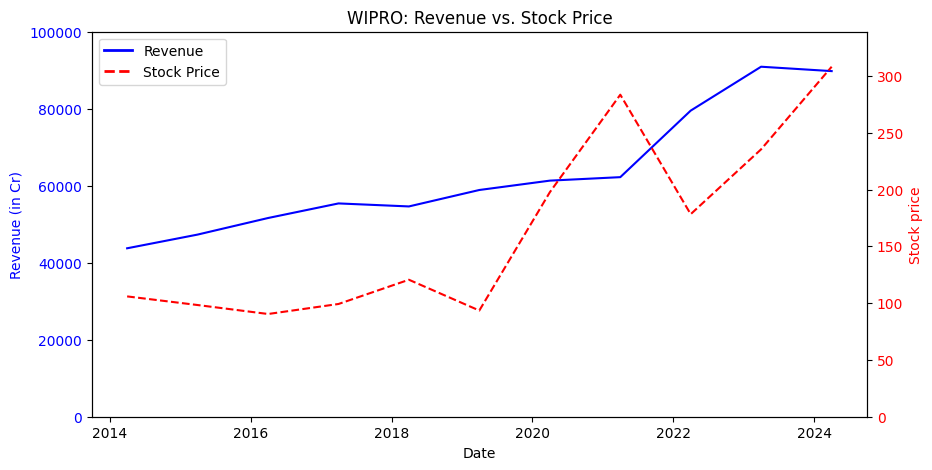

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=wipro, x="TIME PERIOD", y="REVENUE (in Cr)", ax=ax1, color="blue")
ax1.set_ylabel("Revenue (in Cr)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, wipro["REVENUE (in Cr)"].max() * 1.1)

ax2 = ax1.twinx()
sns.lineplot(data=wipro, x="TIME PERIOD", y="WIPRO.NS", ax=ax2, color="red",linestyle="dashed")
ax2.set_ylabel("Stock price", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, wipro["WIPRO.NS"].max() * 1.1)

legend_labels = [
    plt.Line2D([0], [0], color="blue", lw=2, label="Revenue"),
    plt.Line2D([0], [0], color="red", lw=2, linestyle="dashed", label="Stock Price")
]
ax1.legend(handles=legend_labels, loc="upper left")

ax1.set_xlabel("Date")
plt.title("WIPRO: Revenue vs. Stock Price")
plt.savefig("..\Graphs and Images\wipro_rev_stk.png")

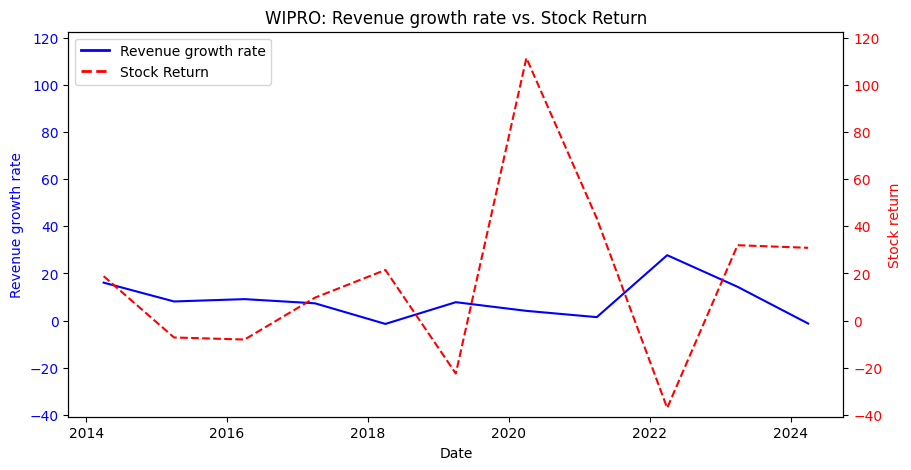

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=wipro, x="TIME PERIOD", y="REVENUE GROWTH RATE", ax=ax1, color="blue")
ax1.set_ylabel("Revenue growth rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=wipro, x="TIME PERIOD", y="WIPRO_Return", ax=ax2, color="red",linestyle="dashed")
ax2.set_ylabel("Stock return", color="red")
ax2.tick_params(axis="y", labelcolor="red")

min_y = min(wipro["REVENUE GROWTH RATE"].min(), wipro["WIPRO_Return"].min()) * 1.1
max_y = max(wipro["REVENUE GROWTH RATE"].max(), wipro["WIPRO_Return"].max()) * 1.1
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

legend_labels = [
    plt.Line2D([0], [0], color="blue", lw=2, label="Revenue growth rate"),
    plt.Line2D([0], [0], color="red", lw=2, linestyle="dashed", label="Stock Return")
]
ax1.legend(handles=legend_labels, loc="upper left")

ax1.set_xlabel("Date")
plt.title("WIPRO: Revenue growth rate vs. Stock Return")

plt.savefig("..\Graphs and Images\wipro_rate_ret.png")

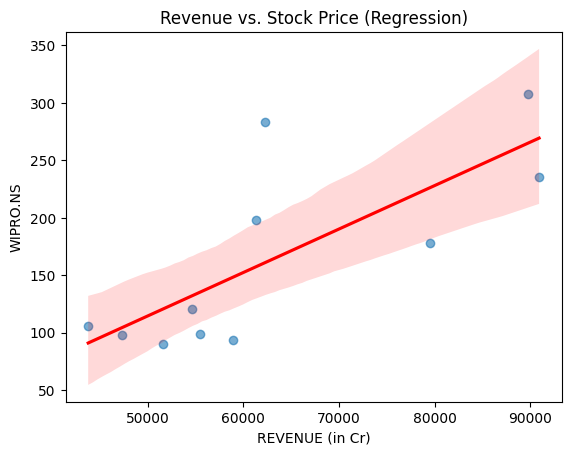

In [6]:
sns.regplot(data=wipro, x="REVENUE (in Cr)", y="WIPRO.NS", scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Revenue vs. Stock Price (Regression)")
plt.savefig("..\Graphs and Images\wipro_rev_stk_reg.png")

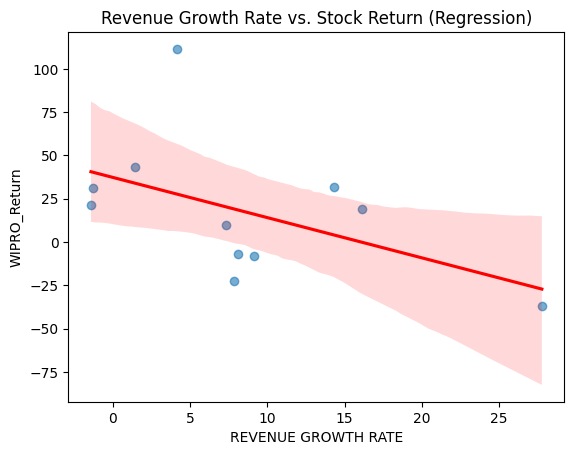

In [7]:
sns.regplot(data=wipro, x="REVENUE GROWTH RATE", y="WIPRO_Return", scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Revenue Growth Rate vs. Stock Return (Regression)")
plt.savefig("..\Graphs and Images\wipro_rate_ret_reg.png")

Compared to TCS and Infosys, Wipro exhibits a weaker correlation between revenue growth and stock price over the long term. While both stock price and revenue show an overall upward trend, stock price fluctuations are significantly more pronounced.  

Additionally, there is little to no correlation between stock return and revenue growth rate, suggesting that other factors play a major role in influencing stock performance.

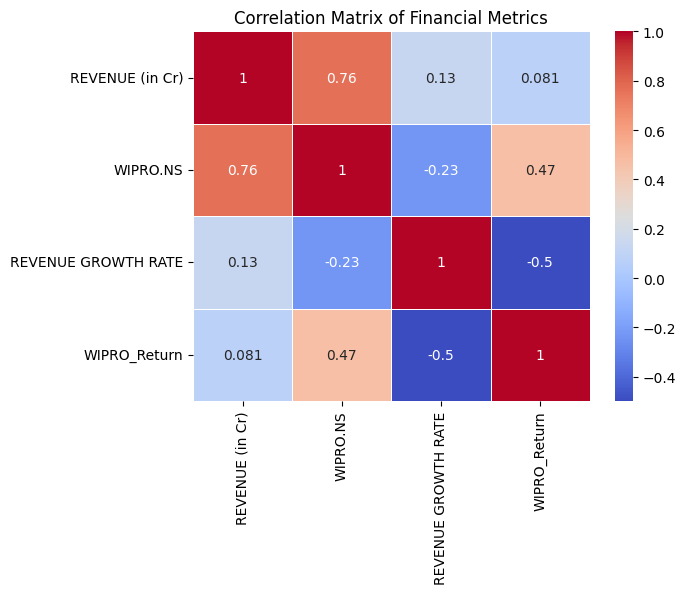

In [8]:
corr_matrix = wipro[["REVENUE (in Cr)", "WIPRO.NS", "REVENUE GROWTH RATE", "WIPRO_Return"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Financial Metrics")
plt.savefig("..\Graphs and Images\wipro_corr.png")

In [9]:
corr1 = wipro["REVENUE (in Cr)"].corr(wipro["WIPRO.NS"])
corr2 = wipro["REVENUE GROWTH RATE"].corr(wipro["WIPRO_Return"])
print(f"Correlation between revenue and stock price: {corr1:.4f}")
print(f"Correlation between revenue growth rate and stock return: {corr2:.4f}")

Correlation between revenue and stock price: 0.7616
Correlation between revenue growth rate and stock return: -0.4982


Wipro shows a moderate correlation (**0.7616**) between revenue and stock price, indicating that while stock price generally trends upward with revenue, the relationship is not as strong as in some other companies. Additionally, the negative correlation (**-0.4982**) between revenue growth rate and stock return suggests that short-term stock performance is influenced by factors beyond revenue growth, with stock returns potentially reacting to market conditions, investor sentiment, or other external variables.
***